In [42]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('seaborn-whitegrid')
import seaborn as sns
%matplotlib inline

In [43]:
data = pd.read_csv('resources/Machine Learning Sections/Decision-Trees-and-Random-Forests/kyphosis.csv')

In [44]:
data.head()

Kyphosis  Age  Number  Start
0   absent   71       3      5
1   absent  158       3     14
2  present  128       4      5
3   absent    2       5      1
4   absent    1       4     15

In [93]:
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

cf.go_offline()

In [95]:
matplotlib.style.use('seaborn-whitegrid')
data.scatter_matrix()

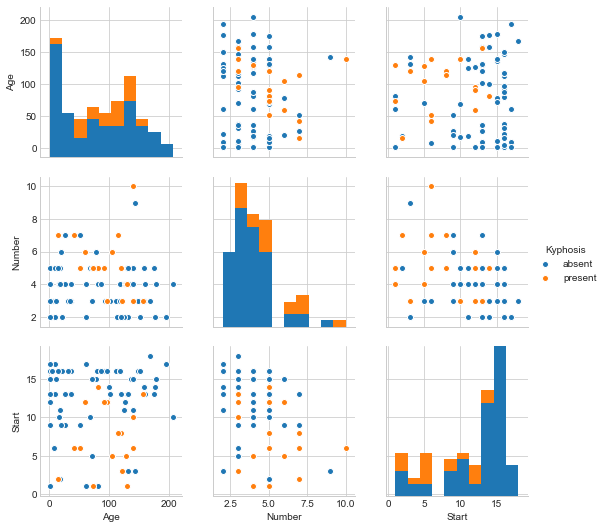

In [45]:
sns.pairplot(data, hue='Kyphosis')

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X = data.drop('Kyphosis', axis=1)
y = data['Kyphosis']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [49]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [50]:
predictions = dtree.predict(X_test)

In [51]:
from sklearn.metrics import classification_report, confusion_matrix

In [52]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[16  5]
 [ 4  2]]
             precision    recall  f1-score   support

     absent       0.80      0.76      0.78        21
    present       0.29      0.33      0.31         6

avg / total       0.69      0.67      0.68        27



# Now try random forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rfc = RandomForestClassifier(n_estimators=200)

In [55]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [56]:
rfc_predictions = rfc.predict(X_test)

In [57]:
print(confusion_matrix(y_test, rfc_predictions))
print(classification_report(y_test, rfc_predictions))

[[20  1]
 [ 5  1]]
             precision    recall  f1-score   support

     absent       0.80      0.95      0.87        21
    present       0.50      0.17      0.25         6

avg / total       0.73      0.78      0.73        27



In [58]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(data.columns[1:])
features

['Age', 'Number', 'Start']

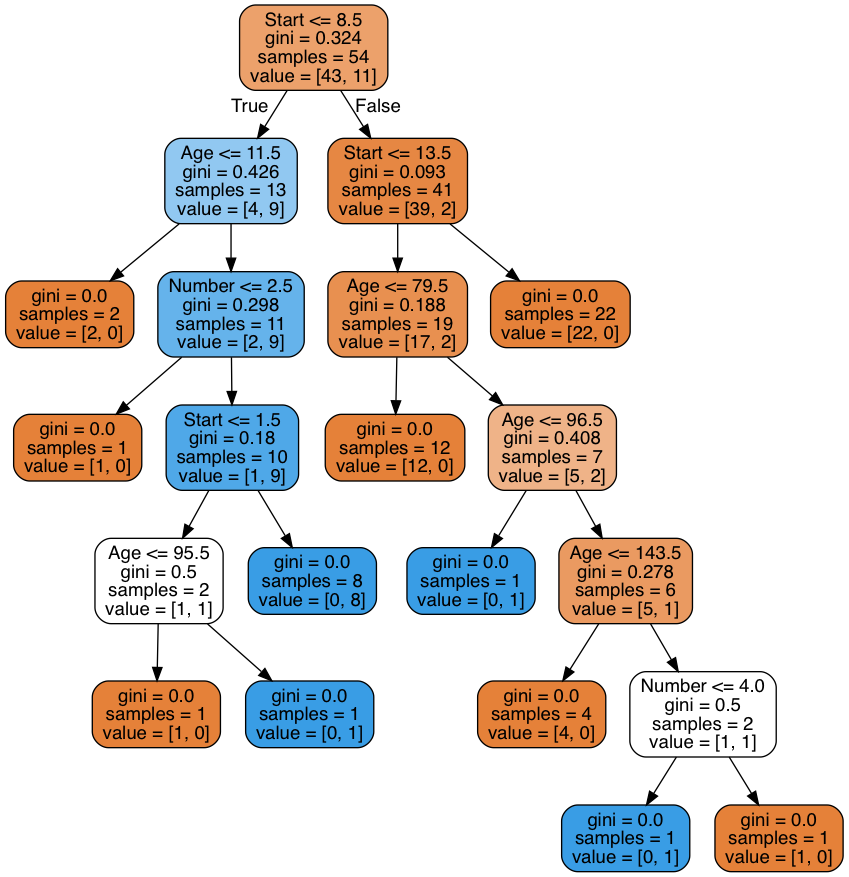

In [59]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=features,filled=True, rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

# Training questions

In [60]:
loans = pd.read_csv('resources/Machine Learning Sections/Decision-Trees-and-Random-Forests/loan_data.csv')

In [61]:
loans.head()

credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0               0  
1            0        0               0  
2            0        0               0  
3            0        0               0  
4            1        0               0

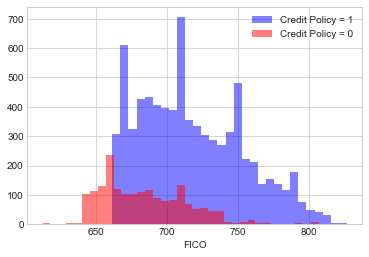

In [62]:
loans[loans['credit.policy']==1]['fico'].hist(bins=35, color='blue', label='Credit Policy = 1', alpha=0.5)
loans[loans['credit.policy']==0]['fico'].hist(bins=35, color='red', label='Credit Policy = 0', alpha=0.5)
plt.legend()
plt.xlabel('FICO')

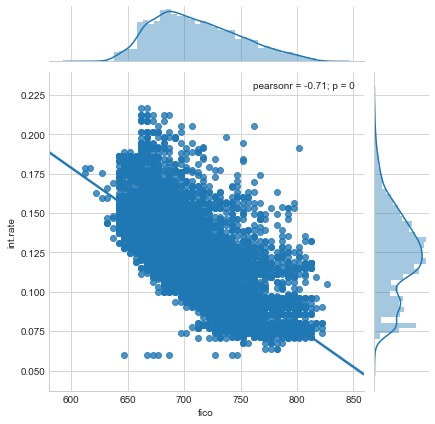

In [64]:
sns.jointplot(x='fico', y='int.rate', data=loans, kind='reg')

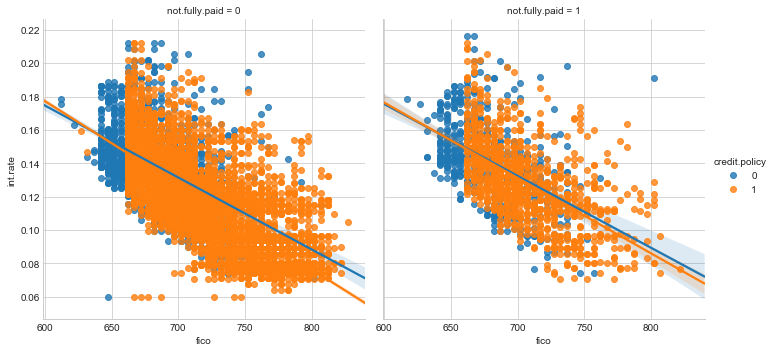

In [69]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate', 
           x='fico', 
           data=loans, 
           hue='credit.policy', 
           col='not.fully.paid')

In [70]:
cat_feats =['purpose']

In [72]:
final_data = pd.get_dummies(loans, columns=cat_feats, drop_first=True)

In [73]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
credit.policy                 9578 non-null int64
int.rate                      9578 non-null float64
installment                   9578 non-null float64
log.annual.inc                9578 non-null float64
dti                           9578 non-null float64
fico                          9578 non-null int64
days.with.cr.line             9578 non-null float64
revol.bal                     9578 non-null int64
revol.util                    9578 non-null float64
inq.last.6mths                9578 non-null int64
delinq.2yrs                   9578 non-null int64
pub.rec                       9578 non-null int64
not.fully.paid                9578 non-null int64
purpose_credit_card           9578 non-null uint8
purpose_debt_consolidation    9578 non-null uint8
purpose_educational           9578 non-null uint8
purpose_home_improvement      9578 non-null uint8
purpose_major_purchase        9

In [74]:
from sklearn.cross_validation import train_test_split

In [75]:
X = final_data.drop('not.fully.paid', axis=1)
y = final_data['not.fully.paid']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [77]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [78]:
predictions = dtree.predict(X_test)

In [79]:
from sklearn.metrics import classification_report, confusion_matrix

In [80]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.85      0.84      0.85      2650
          1       0.23      0.23      0.23       511

avg / total       0.75      0.75      0.75      3161



In [81]:
print(confusion_matrix(y_test, predictions))

[[2239  411]
 [ 391  120]]


In [82]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=300)

In [83]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [84]:
predictions = rfc.predict(X_test)

In [86]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.84      0.99      0.91      2650
          1       0.35      0.02      0.03       511

avg / total       0.76      0.84      0.77      3161



In [85]:
print(confusion_matrix(y_test, predictions))

[[2633   17]
 [ 502    9]]


In [87]:
from bokeh.plotting import figure
from bokeh.resources import CDN
from bokeh.embed import file_html

plot = figure()
plot.circle([1,2], [3,4])

html = file_html(plot, CDN, "my plot")

In [91]:
from plotly.offline.offline import _plot_html